In [2]:
import numpy as np
import pandas as pd

In [3]:
#01. 데이터 불러오기
df_2010 = pd.read_csv('data/2010년 드라마.csv',encoding='cp949',engine='python')
df_2011 = pd.read_csv('data/2011년 드라마.csv',encoding='cp949',engine='python')
df_2012 = pd.read_csv('data/2012년 드라마.csv',encoding='cp949',engine='python')
df_2013 = pd.read_csv('data/2013년 드라마.csv',encoding='cp949',engine='python')
df_2014 = pd.read_csv('data/2014년 드라마.csv',encoding='cp949',engine='python')
df_2015 = pd.read_csv('data/2015년 드라마.csv',encoding='cp949',engine='python')
df_2016 = pd.read_csv('data/2016년 드라마.csv',encoding='cp949',engine='python')
df_2017 = pd.read_csv('data/2017년 드라마.csv',encoding='cp949',engine='python')
df_2018 = pd.read_csv('data/2018년 드라마.csv',encoding='cp949',engine='python')
df_2019 = pd.read_csv('data/2019년 드라마.csv',encoding='cp949',engine='python')
df_2020 = pd.read_csv('data/2020년 드라마.csv',encoding='cp949',engine='python')

In [4]:
# df_2010.shape, df_2011.shape, df_2012.shape, df_2013.shape, df_2014.shape, df_2015.shape,\
# df_2016.shape, df_2017.shape, df_2018.shape, df_2019.shape, 
df_2020.shape

(84, 30)

In [5]:
df = pd.concat([df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020])

In [6]:
df.columns

Index(['드라마 이름', '방송사', '방송기간', '총 부작', '요일 및 시간', '내용', '제작사', '시청률',
       '등장인물_1', '방송갯수_1', '영화갯수_1', '등장인물_2', '방송갯수_2', '영화갯수_2', '등장인물_3',
       '방송갯수_3', '영화갯수_3', '등장인물_4', '방송갯수_4', '영화갯수_4', '등장인물_5', '방송갯수_5',
       '영화갯수_5', '연출자이름', '드라마활동건수', '영화활동건수', '작가이름', '드라마활동건수.1', '영화활동건수.1',
       '장르', '영화+AD1+E+B:AC'],
      dtype='object')

In [7]:
df = df[['드라마 이름','방송사','방송기간','총 부작','요일 및 시간','시청률','방송갯수_1','영화갯수_1','방송갯수_2','영화갯수_2',\
       '방송갯수_3','영화갯수_3','방송갯수_4','영화갯수_4','방송갯수_5','영화갯수_5','드라마활동건수','영화활동건수',\
       '드라마활동건수.1','영화활동건수.1','장르']]

### 결측치 

In [8]:
# 경고 메세지 숨기기
import warnings
warnings.filterwarnings(action='ignore') 

In [9]:
# 결측값 0으로 채우기 : 영화, 방수 수
df.iloc[:,5:19] = df.iloc[:,5:19].fillna(0)

In [10]:
df.dropna(inplace=True)

In [11]:
df = df.reset_index()
df = df.drop('index',axis=1)

### 강수량, 기온, 대회여부 변수 처리

In [12]:
df['start'] = df['방송기간'].str.split('~').str[0]
df['end'] = df['방송기간'].str.split('~').str[1]

In [13]:
df['start'] = df['start'].str.replace('.','-').str[:10]
df['end'] = df['end'].str.replace('.','-').str[:11]

In [14]:
rain = pd.read_csv('전국_강수량_2010_2020.csv',skiprows=7, encoding='cp949')
temp = pd.read_csv('전국_기온_2010_2020.csv',skiprows=7, encoding='cp949')

In [15]:
rain_temp = pd.concat([rain,temp.iloc[:,2:]],axis=1)

In [16]:
rain_temp.columns = ['날짜', '지점', '강수량', '평균기온', '최저기온', '최고기온']

In [17]:
rain_temp['날짜'] = pd.to_datetime(rain_temp['날짜'])

In [18]:
df = df.dropna()
df.isnull().sum()

드라마 이름       0
방송사          0
방송기간         0
총 부작         0
요일 및 시간      0
시청률          0
방송갯수_1       0
영화갯수_1       0
방송갯수_2       0
영화갯수_2       0
방송갯수_3       0
영화갯수_3       0
방송갯수_4       0
영화갯수_4       0
방송갯수_5       0
영화갯수_5       0
드라마활동건수      0
영화활동건수       0
드라마활동건수.1    0
영화활동건수.1     0
장르           0
start        0
end          0
dtype: int64

In [19]:
df = df.reset_index()
df = df.drop('index',axis=1)

In [20]:
# 대회 정보
com_info = pd.DataFrame (
    data={'start': ['2018-08-18','2018-06-14','2018-02-09','2016-08-05','2014-09-19','2014-06-12',
                   '2014-02-07','2012-07-27','2010-11-12','2010-06-11','2010-02-12'],
          'end' : ['2018-09-02','2018-07-15','2018-02-25','2016-08-21','2014-10-04','2014-07-13',
                  '2014-02-23','2012-08-12','2010-11-27','2010-07-11','2010-02-28']},
    index=['제18회 자카르타-팔렘방 아시안게임','2018 러시아 월드컵','제23회 대한민국 평창 동계 올림픽',
           '제31회 리우데자네이루 올림픽','제17회 인천 아시안게임','2014 브라질 월드컵',
           '제22회 소치 동계올림픽','제30회 런던 올림픽','제16회 광저우 아시안게임',
           '2010 남아프리카공화국 월드컵','제21회 밴쿠버 동계올림픽'],
     columns=['start','end'])

In [21]:
com_info

,start,end
제18회 자카르타-팔렘방 아시안게임,2018-08-18,2018-09-02
2018 러시아 월드컵,2018-06-14,2018-07-15
제23회 대한민국 평창 동계 올림픽,2018-02-09,2018-02-25
제31회 리우데자네이루 올림픽,2016-08-05,2016-08-21
제17회 인천 아시안게임,2014-09-19,2014-10-04
2014 브라질 월드컵,2014-06-12,2014-07-13
제22회 소치 동계올림픽,2014-02-07,2014-02-23
제30회 런던 올림픽,2012-07-27,2012-08-12
제16회 광저우 아시안게임,2010-11-12,2010-11-27
2010 남아프리카공화국 월드컵,2010-06-11,2010-07-11


In [22]:
com_info['start'] = pd.to_datetime(com_info['start'])
com_info['end'] = pd.to_datetime(com_info['end'])

In [23]:
competition = []
for n in range(0,11) :
    competition.append(pd.date_range(start=com_info['start'][n], end=com_info['end'][n]))
# competition

In [24]:
df['start'] = pd.to_datetime(df['start'])
df['end'] = pd.to_datetime(df['end'])

df['강수량'] = None
df['기온'] = None
df['스포츠 대회'] = None
# 드라마 개수
for i in range(0,len(df)) : 
#     print(i)
    dd = pd.date_range(start=df['start'][i], end=df['end'][i])
    
    df['강수량'][i] = np.mean(rain_temp[rain_temp['날짜'].isin(dd)==True]['강수량'])
    df['기온'][i] = np.mean(rain_temp[rain_temp['날짜'].isin(dd)==True]['평균기온'])
    
    val = sum(competition[0].isin(dd)==True) + sum(competition[1].isin(dd)==True) + sum(competition[3].isin(dd)==True ) + \
          sum(competition[4].isin(dd)==True) + sum(competition[5].isin(dd)==True) + sum(competition[6].isin(dd)==True) + \
          sum(competition[7].isin(dd)==True) + sum(competition[8].isin(dd)==True) + sum(competition[9].isin(dd)==True) + \
          sum(competition[10].isin(dd)==True) >= 1   
#     print(val)
    if val == True : 
        df['스포츠 대회'][i] = 1
    else : 
        df['스포츠 대회'][i] = 0

### 전처리
- 총 부작 : 연속형
- 배우 5명 방송, 영화 평균
- 더미변수 : 방송사, 요일및시간, 장르

In [25]:
df['총 부작'] = df['총 부작'].str.replace('부작','').astype(int)

In [26]:
df['배우_방송'] = np.mean(df[['방송갯수_1','방송갯수_2','방송갯수_3','방송갯수_4','방송갯수_5']],axis=1)
df['배우_영화'] = np.mean(df[['영화갯수_1','영화갯수_2','영화갯수_3','영화갯수_4','영화갯수_5']],axis=1)

In [27]:
df['시청률'] = df['시청률'].str[1:-2]
# df['시청률'] 

In [28]:
df.index[df['시청률'] == ''],

(Int64Index([315, 350], dtype='int64'),)

In [29]:
df.drop(df.index[df['시청률'] == ''],inplace=True)

In [30]:
df = df.reset_index()
df = df.drop('index',axis=1)

In [32]:
# # 시청률 평균 => 리스트에 있는 값들을 평균내기
# df['평균시청률'] = None
# # df['시청률'] = df['시청률'].str[1:-2]

# for i in range(0,len(df)) : 
#     df['평균시청률'][i] = np.mean(list(map(float,df['시청률'][i].replace("'","").split(','))))

In [342]:
df['시청률']

0      9.0', '9.0', '9.6', '11.5', '10.4', '8.2', '9....
1      11.8', '12.0', '11.9', '12.9', '11.2', '11.6',...
2      43.9', '41.9', '40.8', '42.9', '38.1', '40.0',...
3      16.7', '15.2', '15.3', '14.6', '17.0', '14.6',...
4      10.1', '10.2', '10.0', '10.2', '9.5', '9.0', '...
                             ...                        
831    5.9', '6.1', '5.4', '6.5', '5.7', '5.8', '6.1'...
832    4.7', '5.1', '6.2', '6.9', '5.2', '5.3', '6.1'...
833    2.5', '2.5', '3.7', '3.5', '3.0', '3.6', '4.2'...
834    2.5', '3.7', '3.1', '4.2', '3.3', '4.5', '3.2'...
835    14.9', '18.0', '17.2', '19.9', '17.6', '18.6',...
Name: 시청률, Length: 836, dtype: object

In [306]:
df['평균시청률'] = df['평균시청률'].astype(float)

In [307]:
df.columns

Index(['드라마 이름', '방송사', '방송기간', '총 부작', '요일 및 시간', '시청률', '방송갯수_1', '영화갯수_1',
       '방송갯수_2', '영화갯수_2', '방송갯수_3', '영화갯수_3', '방송갯수_4', '영화갯수_4', '방송갯수_5',
       '영화갯수_5', '드라마활동건수', '영화활동건수', '드라마활동건수.1', '영화활동건수.1', '장르', 'start',
       'end', '강수량', '기온', '스포츠 대회', '배우_방송', '배우_영화', '평균시청률'],
      dtype='object')

In [1]:
# df = df[['방송사','총 부작','요일 및 시간','배우_방송','배우_영화','드라마활동건수','영화활동건수','드라마활동건수.1',
#          '영화활동건수.1','장르','평균시청률']]
# df.columns = ['방송사','부작','요일시간','배우_방송','배우_영화','연출_드라마','연출_영화','작가_드라마',
#               '작가_영화','장르','평균시청률']

In [309]:
df

,방송사,부작,요일시간,배우_방송,배우_영화,연출_드라마,연출_영화,작가_드라마,작가_영화,장르,평균시청률
0,MBC,210,22B,38.6,8.8,13.0,0.0,11.0,1.0,시트콤,9.510000
1,KBS1,60,24C,29.8,8.0,10.0,0.0,12.0,1.0,사극,10.943333
2,KBS1,159,22B,28.0,6.2,12.0,0.0,8.0,0.0,드라마,39.346667
3,SBS,124,22B,43.0,14.2,14.0,0.0,8.0,0.0,드라마,13.793333
4,KBS2,162,22A,20.0,10.4,10.0,0.0,5.0,5.0,"코메디, 멜로, 드라마",9.483333
...,...,...,...,...,...,...,...,...,...,...,...
831,tvN,16,24C,21.0,6.2,6.0,0.0,3.0,0.0,판타지,NaN
832,KBS2,32,9C,18.2,10.0,19.0,2.0,2.0,0.0,"메디컬, 로맨스",NaN
833,tvN,12,3C,26.0,16.4,3.0,12.0,2.0,19.0,서스펜스,NaN
834,MBC,32,9C,34.4,12.4,9.0,0.0,3.0,0.0,수사물,NaN


In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   방송사     978 non-null    object 
 1   부작      978 non-null    int32  
 2   요일시간    978 non-null    object 
 3   배우_방송   978 non-null    float64
 4   배우_영화   978 non-null    float64
 5   연출_드라마  978 non-null    float64
 6   연출_영화   978 non-null    float64
 7   작가_드라마  978 non-null    float64
 8   작가_영화   978 non-null    float64
 9   장르      978 non-null    object 
 10  평균시청률   978 non-null    float64
dtypes: float64(7), int32(1), object(3)
memory usage: 80.4+ KB


### 더미화

In [11]:
drama_genre_set = sorted(set.union(*(set(x.split(',')) for x in df.장르)))
drama_time_set = pd.get_dummies(df['요일시간'], prefix = '요일시간')
drama_broadcast = pd.get_dummies(df['방송사'], prefix = '방송사')

In [12]:
indicator_mat = pd.DataFrame(np.zeros((len(df), len(drama_genre_set))),columns=drama_genre_set)

In [13]:
for i, genre in enumerate(df.장르):
#     print(i,genre)
    indicator_mat.loc[i, genre.split(',')]=1

In [14]:
drama_mat = pd.concat([df[['평균시청률','배우_방송','배우_영화','연출_드라마','연출_영화','작가_드라마',
                          '작가_영화','부작']],drama_time_set,drama_broadcast],axis=1)
drama_mat = drama_mat.join(indicator_mat.add_prefix('genre_'))

In [167]:
drama_mat

,평균시청률,배우_방송,배우_영화,연출_드라마,연출_영화,작가_드라마,작가_영화,부작,요일시간_10C,요일시간_11C,...,genre_사극,genre_서스펜스,genre_스릴러,genre_액션,genre_청춘,genre_추리,genre_코메디,genre_판타지,genre_하이틴,genre_휴먼
0,7.283333,17.400000,5.4,13.0,1.0,0.0,0.0,123,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20.516667,20.800000,3.4,4.0,1.0,0.0,0.0,124,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,39.276667,20.400000,3.8,15.0,0.0,7.0,0.0,106,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,13.420000,41.800000,8.4,5.0,0.0,5.0,0.0,80,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.906667,21.200000,8.8,12.0,0.0,13.0,0.0,52,0,0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,4.012500,24.200000,4.4,7.0,0.0,0.0,0.0,16,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105,3.800000,18.000000,12.6,0.0,0.0,1.0,3.0,16,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,3.468750,12.800000,8.8,16.0,0.0,1.0,10.0,16,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107,0.200000,9.800000,2.8,0.0,0.0,0.0,0.0,4,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 모델링
- linear regression
- random forest
- xgboosting

In [265]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor
# import xgboost as xgb
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import math
import seaborn as sns
import matplotlib as mpl

plt.style.use(['seaborn-whitegrid'])
%matplotlib inline
#  한글글꼴로 변경
plt.rcParams['font.size'] = 12.0
plt.rcParams['font.family'] = 'Malgun Gothic'
# 음수 표시 에러 
mpl.rcParams['axes.unicode_minus'] = False

In [156]:
# drama_mat.info()
drama_mat['평균시청률'] = drama_mat['평균시청률'].astype(float)

In [157]:
X = drama_mat.iloc[:,1:]
y = drama_mat.iloc[:,0]

In [158]:
# train / test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [159]:
# linear regression
# reg = linear_model.LinearRegression()
# reg.fit(X=X_train,y=y_train)
# # DecisionTree
# dt = DecisionTreeRegressor(random_state=20)
# dt.fit(X=X_train,y=y_train)
# RandomForest
# rf = RandomForestRegressor(n_estimators=100,n_jobs=-1,random_state=100)
# rf.fit(X=X_train,y=y_train)
# Grandient Boosting
gb_reg = ensemble.GradientBoostingRegressor(random_state=0, max_depth=1,n_estimators=500,loss='ls')
gb_reg.fit(X_train,y_train)
# XGBoosting
# xgb_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
#                 max_depth = 5, alpha = 10, n_estimators = 10)
# xgb_reg.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=1, n_estimators=500, random_state=0)

In [160]:
# model score
# print(reg.score(X_train, y_train))
# print(dt.score(X_train, y_train))
# print(rf.score(X_train, y_train))
gb_reg.score(X_train, y_train)
# xgb_reg.score(X_train, y_train)

0.948549265515979

In [161]:
# k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
# score = cross_val_score(rf,X_train,y_train,cv=5)
# score

In [168]:
# 예측
# reg_pred_value = reg.predict(X_test)
# dt_pred_value = dt.predict(X_test)
# rf_pred_value = rf.predict(X_test)
# xgb_reg_pred_value = xgb_reg.predict(X_test)
gb_reg_pred_value = gb_reg.predict(X_test)


In [163]:
# 측정 : RMSE (Root Mean Squred Error)
# reg_RMSE = math.sqrt(mean_squared_error(y_test, reg_pred_value))
# dt_RMSE = math.sqrt(mean_squared_error(y_test, dt_pred_value))
# rf_RMSE = math.sqrt(mean_squared_error(y_test, rf_pred_value))
# xgb_reg_RMSE = math.sqrt(mean_squared_error(y_test, xgb_reg_pred_value))
gb_reg_RMSE = math.sqrt(mean_squared_error(y_test, gb_reg_pred_value))
gb_reg_RMSE

2.3943568717081534

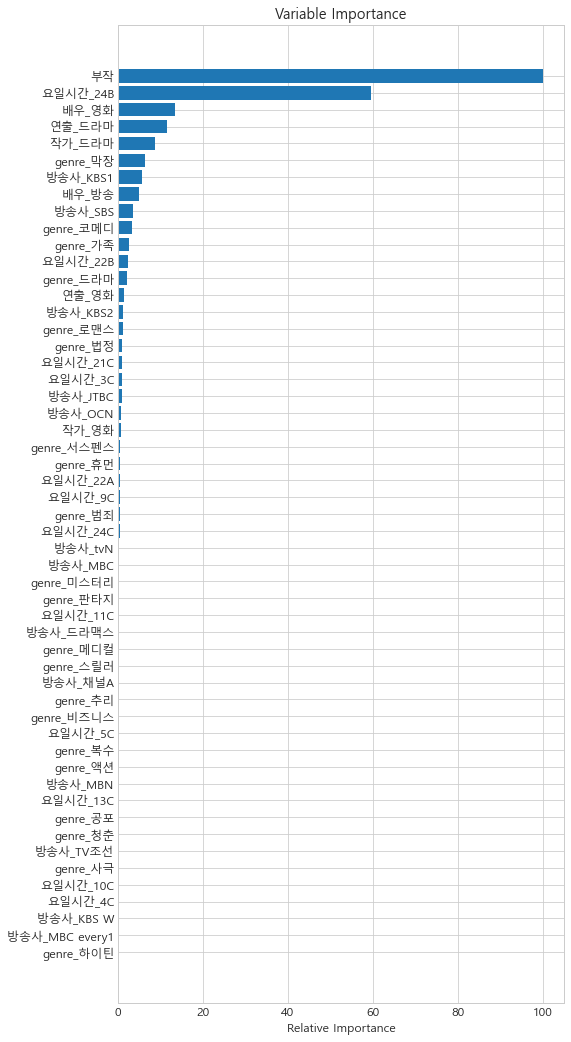

In [166]:
# RandomForest
feature_importance = rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 18))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

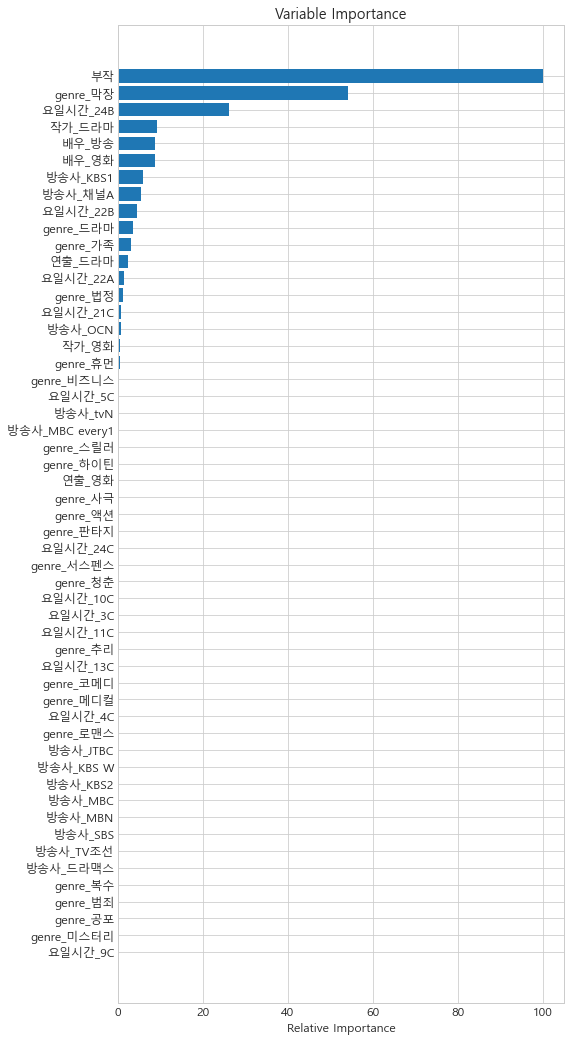

In [164]:
# gradient boosting
feature_importance = gb_reg.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 18))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
# 데이터 수가 너무 적음 : MSE 큰 값의 원인


In [462]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)

    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)

    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)

    # 평균을 낸다.
    mean_difference = difference.mean()

    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)

    return score
rmsle_scorer = make_scorer(rmsle)